In [58]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [115]:
train_df = pd.read_excel("Train.xlsx")
test_df = pd.read_excel("Test.xlsx")

In [116]:
train_df.head()

,Date,Sales
0,2012-08-25,1.779513
1,2012-08-26,1.914854
2,2012-08-27,1.607275
3,2012-08-28,1.554563
4,2012-08-29,1.581139


In [117]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433 entries, 0 to 432
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    433 non-null    datetime64[ns]
 1   Sales   433 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.9 KB


In [118]:
train_df.set_index("Date", inplace=True)
test_df.set_index("Date", inplace=True)

In [119]:
train_df.head()

,Sales
Date,
2012-08-25,1.779513
2012-08-26,1.914854
2012-08-27,1.607275
2012-08-28,1.554563
2012-08-29,1.581139


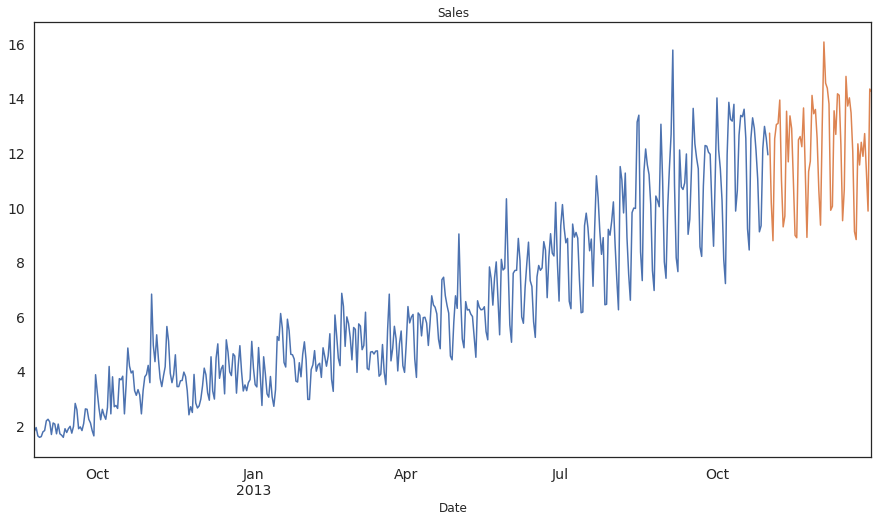

In [120]:
train_df.Sales.plot(figsize=(15,8), title= 'Sales', fontsize=14)
test_df.Sales.plot(figsize=(15,8), title= 'Sales', fontsize=14)
plt.show()

In [73]:
!pip3 install auto-ts

In [74]:
from auto_ts import auto_timeseries

In [127]:
model = auto_timeseries(forecast_period=61,
                        score_type='rmse', time_interval='D',
                        model_type='best')

In [122]:
train_df.reset_index(inplace=True)

In [123]:
train_df.head()

,Date,Sales
0,2012-08-25,1.779513
1,2012-08-26,1.914854
2,2012-08-27,1.607275
3,2012-08-28,1.554563
4,2012-08-29,1.581139


In [128]:
model.fit(traindata= train_df, 
          ts_column="Date",
          target="Sales")

Start of Fit.....
    Target variable given as = Sales
Start of loading of data.....
Input is data frame. Performing Time Series Analysis
ts_column: Date sep: , target: Sales
    Dataframe loaded successfully. Shape of data set = (433, 1)
Time Interval is given as D
    Correct Time interval given as a valid Pandas date-range frequency...


Building Prophet Model



Running Facebook Prophet Model...
  Starting Prophet Fit
  End of Prophet Fit
  Starting Prophet Cross Validation
Max. iterations using expanding window cross validation = 5
    RMSE = 0.95
    Std Deviation of Originals = 0.96
    Normalized RMSE = 100%
Cross Validation window: 1 completed
    RMSE = 0.78
    Std Deviation of Originals = 0.98
    Normalized RMSE = 80%
Cross Validation window: 2 completed
    RMSE = 1.40
    Std Deviation of Originals = 1.33
    Normalized RMSE = 105%
Cross Validation window: 3 completed
    RMSE = 1.46
    Std Deviation of Originals = 1.80
    Normalized RMSE = 81%
Cross Validation window:

In [129]:
future_predictions = model.predict(testdata=61)

Building Forecast dataframe. Forecast Period = 61


In [130]:
test_df.reset_index(inplace=True)

In [131]:
test_df["Prophet Predictions"] = future_predictions["yhat"].values

In [132]:
test_df.head()

,Date,Sales,Prophet Predictions
0,2013-11-01,12.711543,12.601261
1,2013-11-02,10.152996,11.289886
2,2013-11-03,8.765463,11.119639
3,2013-11-04,12.506665,12.799478
4,2013-11-05,13.028814,12.926068


In [133]:
test_df.set_index("Date", inplace=True)

In [134]:
test_df.head(3)

,Sales,Prophet Predictions
Date,,
2013-11-01,12.711543,12.601261
2013-11-02,10.152996,11.289886
2013-11-03,8.765463,11.119639


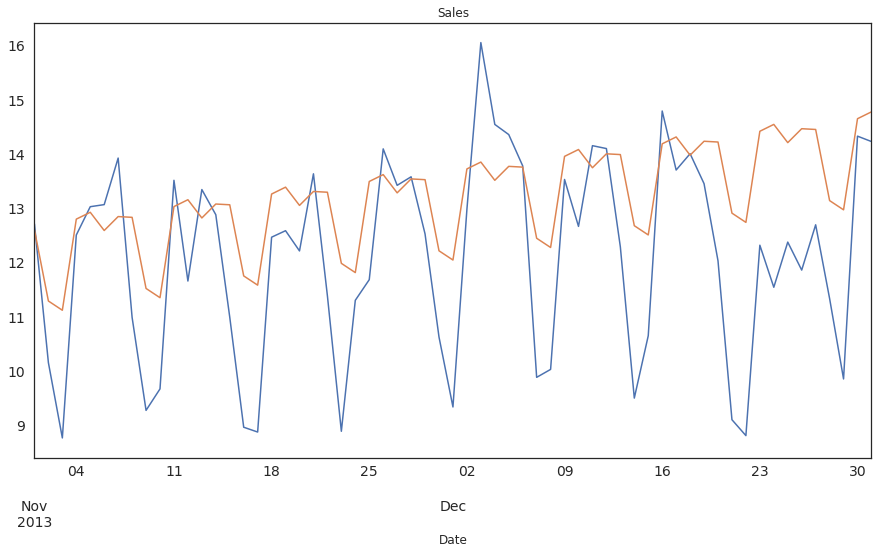

In [135]:
test_df["Sales"].plot(figsize=(15,8), title= 'Sales', fontsize=14)
test_df["Prophet Predictions"].plot(figsize=(15,8), title= 'Sales', fontsize=14)
plt.show()